# Supervised Learning

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [5]:
names = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url, names = names)

In [7]:
dataset.shape

(150, 5)

In [10]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
validation_size =0.2
seed = 7
scoring = 'accuracy'
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = validation_size,random_state=seed)

In [11]:
models = []
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB',GaussianNB()))
models.append(('SVM',SVC()))

In [19]:
results =[]
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 2, random_state = seed) #Va a ejecutar 5 veces el modelo sobre 5 muestras del dataset
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name},{cv_results.mean()},({cv_results.std()})')

LR,0.9916666666666667,(0.00833333333333336)
LDA,0.975,(0.008333333333333304)
KNN,0.975,(0.008333333333333304)
CART,0.9916666666666667,(0.00833333333333336)
NB,0.9666666666666667,(0.0)
SVM,0.9916666666666667,(0.00833333333333336)


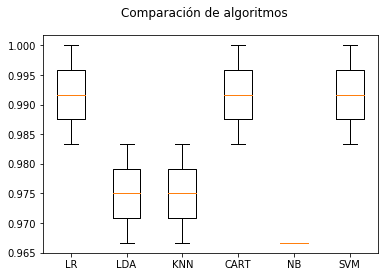

In [20]:
fig = plt.figure()
fig.suptitle('Comparación de algoritmos')
ax = fig.add_subplot()
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()